In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Colors
using Random
using Imbalance


include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 50
num_features = 2
probs = [0.5, 0.2, 0.3]

X, y = generate_imbalanced_data(num_rows, num_features; probs, type="DictColTable")

Xm = Tables.matrix(X)

50×2 Matrix{Float64}:
 0.595569   0.269933
 0.423379   0.0922305
 0.401897   0.921504
 0.0172004  0.610244
 0.932064   0.0210672
 0.911442   0.411613
 0.799009   0.232829
 0.580682   0.570289
 0.583638   0.0696542
 0.767597   0.113055
 ⋮          
 0.939164   0.805269
 0.312302   0.908769
 0.944544   0.825904
 0.105869   0.171536
 0.426463   0.616252
 0.852318   0.52349
 0.71374    0.47124
 0.873125   0.264702
 0.09368    0.626339

### 2. Apply ROSE

In [3]:
Xover, yover = rose(Xm, y; ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=rng)

([0.595568984410998 0.2699331446389308; 0.4233793618929471 0.0922304988147824; … ; 0.29084887362600514 0.7236822953138622; 0.8764483941616736 0.9322235573197056], CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3. Plot the Results

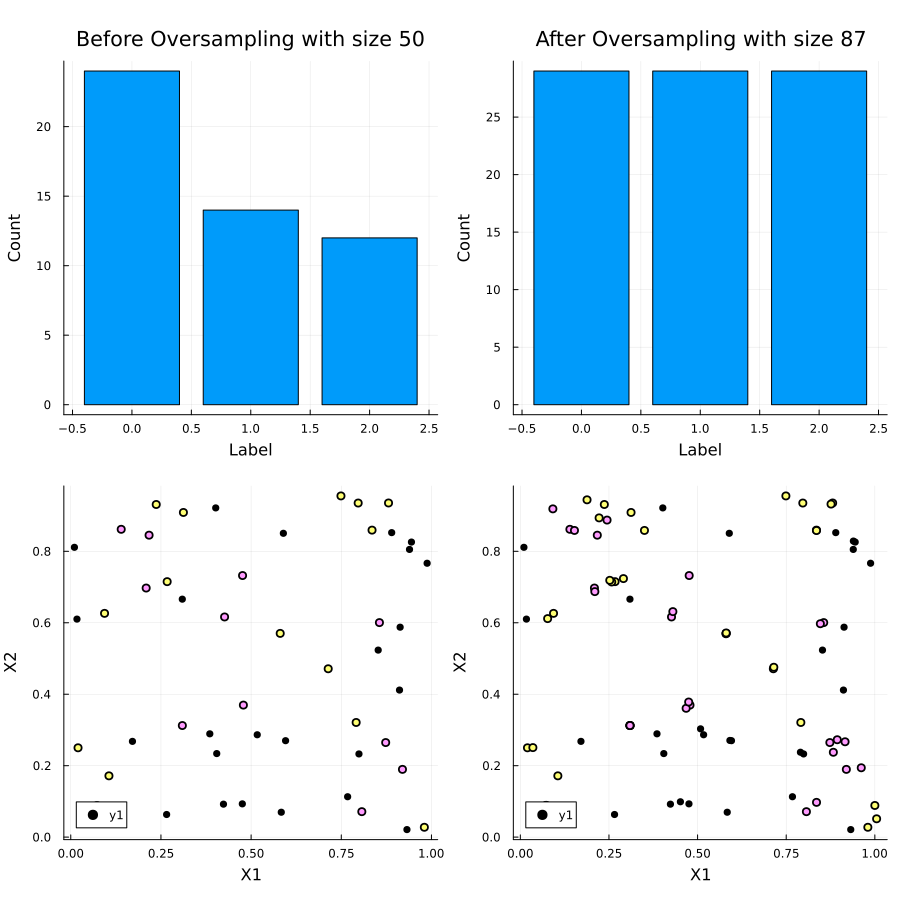

In [4]:
plot_data(y, yover, X, Xover)